## Physics: Lab 2 - Yaroshchuk Vlavislav, M3208

In [1]:
# Required libs
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from numpy import polyfit, polyval

In [2]:
# Input data
# R - Resistance in ohms
# U - Voltare on resistor in volts
# I - Current through resistor in mA
df = pd.DataFrame({'R': list(range(100, 1501, 100)), 
                   'U':[0.94, 2.4, 3.6, 4.62, 5.36, 6.0, 6.87, 7.41, 7.77, 8.18, 8.45, 8.78, 9.03, 9.3, 9.3], 
                   'I':[18.72, 16.56, 14.81, 13.29, 12.19, 11.26, 9.98, 9.19, 8.65, 8.06, 7.67, 7.18, 6.8, 6.42, 6.41]})
# mA to A
df['I'] /= 1000

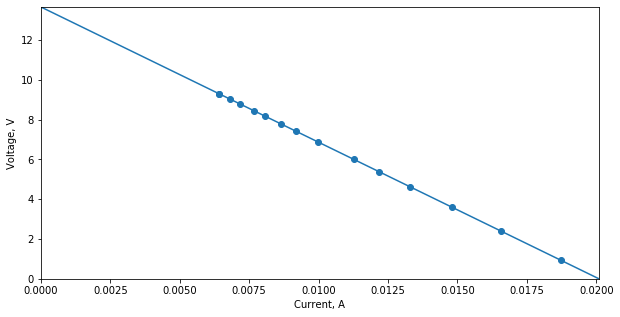

In [3]:
# Arrays of Voltage, Current
U = np.array(df['U'])
I = np.array(df['I'])

# Approximation
k, b = polyfit(I, U, 1)

# Highest current
maxI = -b/k

# Printing graph I(U)
x = np.linspace(0, 15, 1000)
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, maxI))
ax.set_ylim((0, b))
ax.scatter(df['I'], df['U'])
ax.set_ylabel('Voltage, V')
ax.set_xlabel('Current, A')
ax.plot(x, polyval([k, b], x))

In [4]:
# EMF
E = round(b, 3)

# Internal resistance
r = E/maxI

print('EMF, Volts =', E)
print('Internal resistance, Ohm =', r)

EMF, Volts = 13.655
Internal resistance, Ohm = 679.5321375721837


In [5]:
# Net power P = I^2 * R = U * I
df['Pnet'] = df['U']*df['I']

# Power loss P = I^2 * r
df['Ploss'] = df['I']**2 *r

# Full power 
df['Pfull'] = E*df['I'] 

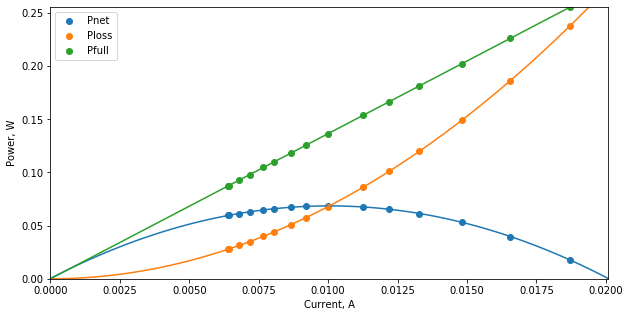

In [6]:
# Printing graph for power data, approximation used
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, maxI))
ax.set_ylim((0, max(df['Pfull'])))

x = np.linspace(0, maxI, 100)

k2, k1, k = polyfit(np.array(df['I']), np.array(df['Pnet']), 2)
ax.scatter(df['I'], df['Pnet'], label='Pnet')
ax.plot(x, polyval([k2, k1, k], x))

k2, k1, k = polyfit(np.array(df['I']), np.array(df['Ploss']), 2)
ax.scatter(df['I'], df['Ploss'], label='Ploss')
ax.plot(x, polyval([k2, k1, k], x))

k1, k = polyfit(np.array(df['I']), np.array(df['Pfull']), 1)
ax.scatter(df['I'], df['Pfull'], label='Pfull')
ax.plot(x, polyval([k1, k], x))

ax.set_ylabel('Power, W')
ax.set_xlabel('Current, A')
ax.legend()

In [7]:
# Calcutating efficiency
df['n'] = df['Pnet'] / df['Pfull']

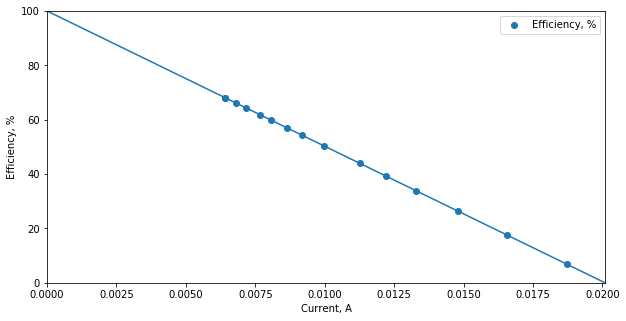

In [8]:
# Printing graph for efficency, approximation used
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim((0, maxI))
ax.set_ylim((0, 100))
x = np.linspace(0, maxI, 100)

ax.scatter(df['I'], df['n'] * 100, label='Efficiency, %')
k1, k = polyfit(np.array(df['I']), np.array(df['n'] * 100), 1)
ax.set_ylabel('Efficiency, %')
ax.set_xlabel('Current, A')
ax.plot(x, polyval([k1, k], x))
ax.legend()

In [9]:
# Rationing data according to the conditions
df['Pnet'] *= 1000
df['Pfull'] *= 1000
df['Ploss'] *= 1000
df['I'] *= 1000
df['n'] *= 100

In [10]:
# Printing data tabel
df

,R,U,I,Pnet,Ploss,Pfull,n
0,100,0.94,18.72,17.5968,238.134155,255.62160,6.883925
1,200,2.40,16.56,39.7440,186.350544,226.12680,17.575979
2,300,3.60,14.81,53.3160,149.045929,202.23055,26.363969
3,400,4.62,13.29,61.3998,120.021752,181.47495,33.833761
4,500,5.36,12.19,65.3384,100.975825,166.45445,39.253021
5,600,6.00,11.26,67.5600,86.156249,153.75530,43.939949
6,700,6.87,9.98,68.5626,67.681673,136.27690,50.311241
7,800,7.41,9.19,68.0979,57.390634,125.48945,54.265837
8,900,7.77,8.65,67.2105,50.844293,118.11575,56.902234
9,1000,8.18,8.06,65.9308,44.144854,110.05930,59.904797


In [11]:
# Printing max current and the best current

print('Max curent, A:', maxI)
print('Current with max net power, A:', E / (2*r))

Max curent, A: 0.020094708174930857
Current with max net power, A: 0.010047354087465429
